In [1]:
from torch import nn
from copy import deepcopy
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import tqdm
import os
import numpy as np
import clip
from PIL import Image

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

test_representation = []
valid_representation = []
train_representation = []

label = ["Black_Hair", "Blond_Hair"]
a = ["5_o_Clock_Shadow","Arched_Eyebrows", "Attractive", "Bags_Under_Eyes", "Bald", "Bangs", "Big_Lips",
         "Big_Nose", "Black_Hair", "Blond_Hair", "Blurry", "Brown_Hair", "Bushy_Eyebrows", "Chubby", "Double_Chin",
         "Eyeglasses", "Goatee", "Gray_Hair", "Heavy_Makeup", "High_Cheekbones", "Male", "Mouth_Slightly_Open",
         "Mustache", "Narrow_Eyes", "No_Beard", "Oval_Face", "Pale_Skin", "Pointy_Nose", "Receding_Hairline",
         "Rosy_Cheeks", "Sideburns", "Smiling", "Straight_Hair", "Wavy_Hair", "Wearing_Earrings", "Wearing_Hat",
         "Wearing_Lipstick", "Wearing_Necklace", "Wearing_Necktie", "Young"]

for j in range(len(label)):
    
    hasf = open("../image_label/" + label[j] +".txt")

    test_features = []
    valid_features = []
    train_features = []

    for i in range(0, 500):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            test_features.append(image_features)
    print("finish test")
    
    for k in range(0, 500):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            valid_features.append(image_features)
    print("finish valid")
    
    for a in range(0, 20000):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            train_features.append(image_features)
        if a % 5000 == 0:
            print("finish 5000")
            
    #imgName = hasf.readline().split()
    #imgName = ''.join(imgName)
    #i = 1
    #while imgName:
    #    image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

     #   with torch.no_grad():
     #       image_features = model.encode_image(image)
     #       train_features.append(image_features)
     #   if i % 1000 == 0:
     #       print("finish 1000")
     #   i+=1
     #   imgName = hasf.readline().split()
     #   imgName = ''.join(imgName)

    features0 = torch.cat(test_features).cpu().numpy()
    features1 = torch.cat(valid_features).cpu().numpy()
    features2 = torch.cat(train_features).cpu().numpy()
    test_representation.append(features0)
    valid_representation.append(features1)
    train_representation.append(features2)       

finish test
finish valid
finish 5000
finish 5000
finish 5000
finish 5000
finish test
finish valid
finish 5000
finish 5000
finish 5000
finish 5000


In [11]:
print(train_representation[0].shape)

(20000, 512)


In [15]:
import pickle
with open("train1.pkl","wb") as f:
    pickle.dump(train_representation,f) # black hair; blond hair(20000 train image for each)
f.close()

with open("valid1.pkl","wb") as g:
    pickle.dump(valid_representation,g)
g.close()

with open("test1.pkl","wb") as h:
    pickle.dump(test_representation,h)
h.close()

In [36]:
label2 = ["Straight_Hair", "Wavy_Hair"]

test_representation2 = []
valid_representation2 = []
train_representation2 = []

for j in range(len(label)):
    
    hasf = open("../image_label/" + label[j] +".txt")

    test_features = []
    valid_features = []
    train_features = []

    for i in range(0, 500):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            test_features.append(image_features)
    print("finish test")
    
    for k in range(0, 500):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            valid_features.append(image_features)
    print("finish valid")
    
    for a in range(0, 20000):
        imgName = hasf.readline().split()
        imgName = ''.join(imgName)
        image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            train_features.append(image_features)
        if a % 5000 == 0:
            print("finish 5000")
            
    #imgName = hasf.readline().split()
    #imgName = ''.join(imgName)
    #i = 1
    #while imgName:
    #    image = preprocess(Image.open("../representation/CelebA/Img/img_celeba/" + imgName)).unsqueeze(0).to(device)

     #   with torch.no_grad():
     #       image_features = model.encode_image(image)
     #       train_features.append(image_features)
     #   if i % 1000 == 0:
     #       print("finish 1000")
     #   i+=1
     #   imgName = hasf.readline().split()
     #   imgName = ''.join(imgName)

    features0 = torch.cat(test_features).cpu().numpy()
    features1 = torch.cat(valid_features).cpu().numpy()
    features2 = torch.cat(train_features).cpu().numpy()
    test_representation2.append(features0)
    valid_representation2.append(features1)
    train_representation2.append(features2)       

finish test
finish valid
finish 5000
finish 5000
finish 5000
finish 5000
finish test
finish valid
finish 5000
finish 5000
finish 5000
finish 5000


In [37]:
with open("train2.pkl","wb") as f:
    pickle.dump(train_representation2,f) # straight hair; wavy hair(20000 train image for each)
f.close()

with open("valid2.pkl","wb") as g:
    pickle.dump(valid_representation2,g)
g.close()

with open("test2.pkl","wb") as h:
    pickle.dump(test_representation2,h)
h.close()

In [38]:
class LinearLayerWithActivation(nn.Module):
    def __init__(self, input_shape, num_units, bias=False, activation_type=nn.ReLU()):
        super(LinearLayerWithActivation, self).__init__()
        self.activation_type = activation_type
        self.weights = nn.Parameter(torch.empty(size=(num_units, input_shape[1]), requires_grad=True))
        
        nn.init.normal_(self.weights)
        
        if bias:
            self.bias = nn.Parameter(torch.zeros(num_units), requires_grad=True)
        else:
            self.bias = None
        
    def forward(self, x):
        out = F.linear(x, self.weights, self.bias)
        out = self.activation_type.forward(out)
        return out

In [39]:
import sys
eps = sys.float_info.epsilon

k = 40 # categories

fcc_net = LinearLayerWithActivation(input_shape= [128,512], num_units=k, bias=True, activation_type=nn.Identity())
optimizer = optim.Adam(fcc_net.parameters(), amsgrad=False, weight_decay=0.0)


for name, params in fcc_net.named_parameters():
    print('Parameters with name', name, 'and shape', params.shape)

metric_dict = {'losses1': [],'losses2': [],'losses': []}  

epochs = 100
    
for epoch in range(0,epochs):
    batch_num0 = len(train_representation[0])//128
    batch_num1 = len(train_representation[1])//128
    num = min(batch_num0, batch_num1)
    
    for i in range(0, num):
        x = torch.from_numpy(train_representation[0][i*128:(i+1)*128])
        y = torch.from_numpy(train_representation[1][i*128:(i+1)*128])

        out1 = fcc_net.forward(x)
        out2 = fcc_net.forward(y)

        v_x_pos = torch.var(out1, axis = 0)[0]
        v_x_neg = torch.var(out1, axis = 0)[1]
        v_y_pos = torch.var(out2, axis = 0)[1]
        v_y_neg = torch.var(out2, axis = 0)[0]
        loss1 = torch.log(eps + v_x_pos) - torch.log(eps + v_x_neg)
        loss2 = torch.log(eps + v_y_pos) - torch.log(eps + v_y_neg)
        loss = torch.log(eps + v_x_pos) + torch.log(eps + v_y_pos) - torch.log(eps + v_x_neg) - torch.log(eps + v_y_neg)

        fcc_net.zero_grad() #removes grads of previous step
        optimizer.zero_grad() #removes grads of previous step
        loss.backward() #compute gradients of current step
        optimizer.step() #update step
        metric_dict['losses1'].append(loss1.detach().cpu().numpy()) #.detach: Copies the value of the loss 
    #                                                               and removes it from the graph, 
    #                                                             .cpu() sends to cpu, and 
    #                                                              numpy(), converts it to numpy format.
        metric_dict['losses2'].append(loss2.detach().cpu().numpy()) 
        metric_dict['losses'].append(loss.detach().cpu().numpy())
        
    #valid
    #num2 = 500//128
    #for j in range(0, num2):
     #   m = torch.from_numpy(valid_representation[0][i*128:(i+1)*128])
     #   n = torch.from_numpy(valid_representation[1][i*128:(i+1)*128])

     #   out_m = fcc_net.forward(m)
     #   out_n = fcc_net.forward(n)

     #   v_m_pos = torch.var(out_m, axis = 0)[0]
     #   v_m_neg = torch.var(out_m, axis = 0)[1]
     #   v_n_pos = torch.var(out_n, axis = 0)[1]
     #   v_n_neg = torch.var(out_n, axis = 0)[0]
     #   loss1 = torch.log(eps + v_m_pos) - torch.log(eps + v_m_neg)
     #   loss2 = torch.log(eps + v_n_pos) - torch.log(eps + v_n_neg)
     #   loss = torch.log(eps + v_m_pos) + torch.log(eps + v_n_pos) - torch.log(eps + v_m_neg) - torch.log(eps + v_n_neg)

        


Parameters with name weights and shape torch.Size([40, 512])
Parameters with name bias and shape torch.Size([40])


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



def plot_stats_in_graph(total_losses, y_axis_label, x_axis_label):

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in total_losses.keys():
        if "loss" in k:
            ax_1.plot(np.arange(len(total_losses[k])), total_losses[k], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel(x_axis_label)
    ax_1.set_ylabel(y_axis_label)



    plt.show()

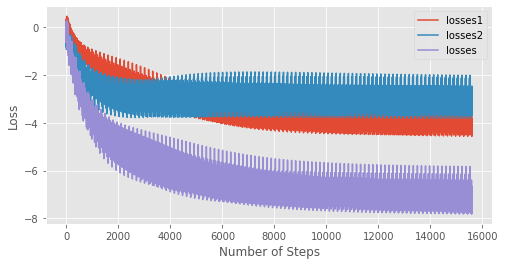

In [41]:
plot_stats_in_graph(metric_dict, y_axis_label='Loss', x_axis_label='Number of Steps')

In [51]:
eps = sys.float_info.epsilon

k = 40 # categories

fcc_net = LinearLayerWithActivation(input_shape= [128,512], num_units=k, bias=True, activation_type=nn.Identity())
optimizer = optim.Adam(fcc_net.parameters(), amsgrad=False, weight_decay=0.0)


for name, params in fcc_net.named_parameters():
    print('Parameters with name', name, 'and shape', params.shape)

metric_dict = {'losses1': [],'losses2': [],'losses': []}
metric_dict_val = {'losses1': [],'losses2': [],'losses': []}
valid_m = []
valid_n = []

epochs = 100
    
for epoch in range(0,epochs):
    batch_num0 = len(train_representation[0])//128
    batch_num1 = len(train_representation[1])//128
    num = min(batch_num0, batch_num1)
    
    for i in range(0, num):
        x = torch.from_numpy(train_representation[0][i*128:(i+1)*128])
        y = torch.from_numpy(train_representation[1][i*128:(i+1)*128])

        out1 = fcc_net.forward(x)
        out2 = fcc_net.forward(y)

        v_x_pos = torch.var(out1, axis = 0)[0]
        v_x_neg = torch.var(out1, axis = 0)[1]
        v_y_pos = torch.var(out2, axis = 0)[1]
        v_y_neg = torch.var(out2, axis = 0)[0]
        loss1 = torch.log(eps + v_x_pos) - torch.log(eps + v_x_neg)
        loss2 = torch.log(eps + v_y_pos) - torch.log(eps + v_y_neg)
        loss = torch.log(eps + v_x_pos) + torch.log(eps + v_y_pos) - torch.log(eps + v_x_neg) - torch.log(eps + v_y_neg)

        fcc_net.zero_grad() #removes grads of previous step
        optimizer.zero_grad() #removes grads of previous step
        loss.backward() #compute gradients of current step
        optimizer.step() #update step
        metric_dict['losses1'].append(loss1.detach().cpu().numpy()) #.detach: Copies the value of the loss 
    #                                                               and removes it from the graph, 
    #                                                             .cpu() sends to cpu, and 
    #                                                              numpy(), converts it to numpy format.
        metric_dict['losses2'].append(loss2.detach().cpu().numpy()) 
        metric_dict['losses'].append(loss.detach().cpu().numpy())
        
    #valid
    num2 = 500//128
    for j in range(0, num2):
        m = torch.from_numpy(valid_representation[0][j*128:(j+1)*128])
        n = torch.from_numpy(valid_representation[1][j*128:(j+1)*128])

        out_m = fcc_net.forward(m)
        out_n = fcc_net.forward(n)

        v_m_pos = torch.var(out_m, axis = 0)[0]
        v_m_neg = torch.var(out_m, axis = 0)[1]
        v_n_pos = torch.var(out_n, axis = 0)[1]
        v_n_neg = torch.var(out_n, axis = 0)[0]
        loss1 = torch.log(eps + v_m_pos) - torch.log(eps + v_m_neg)
        loss2 = torch.log(eps + v_n_pos) - torch.log(eps + v_n_neg)
        loss = torch.log(eps + v_m_pos) + torch.log(eps + v_n_pos) - torch.log(eps + v_m_neg) - torch.log(eps + v_n_neg)
        metric_dict_val['losses1'].append(loss1.detach().cpu().numpy())
        metric_dict_val['losses2'].append(loss2.detach().cpu().numpy())
        metric_dict_val['losses'].append(loss.detach().cpu().numpy())
        if epoch == 99:
            for k in range(0,128):
                valid_m.append(out_m[k][0].detach().cpu().numpy())
                valid_n.append(out_n[k][1].detach().cpu().numpy())

Parameters with name weights and shape torch.Size([40, 512])
Parameters with name bias and shape torch.Size([40])


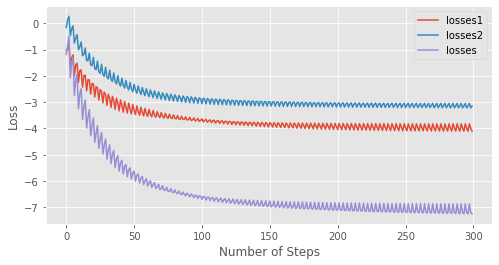

In [52]:
plot_stats_in_graph(metric_dict_val, y_axis_label='Loss', x_axis_label='Number of Steps')

In [54]:
print(sorted(valid_m))

[array(-11.874783, dtype=float32), array(-10.464497, dtype=float32), array(-9.934878, dtype=float32), array(-9.308223, dtype=float32), array(-9.180468, dtype=float32), array(-8.813015, dtype=float32), array(-8.41777, dtype=float32), array(-8.062315, dtype=float32), array(-8.016887, dtype=float32), array(-7.9437656, dtype=float32), array(-7.802991, dtype=float32), array(-7.645407, dtype=float32), array(-7.6224256, dtype=float32), array(-7.615493, dtype=float32), array(-7.367899, dtype=float32), array(-7.30758, dtype=float32), array(-6.9652796, dtype=float32), array(-6.9202857, dtype=float32), array(-6.904552, dtype=float32), array(-6.8971233, dtype=float32), array(-6.8594446, dtype=float32), array(-6.7859306, dtype=float32), array(-6.689074, dtype=float32), array(-6.66376, dtype=float32), array(-6.6307364, dtype=float32), array(-6.5275955, dtype=float32), array(-6.4489527, dtype=float32), array(-6.4401827, dtype=float32), array(-6.4368258, dtype=float32), array(-6.387405, dtype=float32)

In [43]:
eps = sys.float_info.epsilon

k = 40 # categories

fcc_net = LinearLayerWithActivation(input_shape= [128,512], num_units=k, bias=True, activation_type=nn.Identity())
optimizer = optim.Adam(fcc_net.parameters(), amsgrad=False, weight_decay=0.0)


for name, params in fcc_net.named_parameters():
    print('Parameters with name', name, 'and shape', params.shape)

metric_dict1 = {'losses1': [],'losses2': [],'losses3': [],'losses4': [],'losses': []}  

epochs = 100
    
for epoch in range(0,epochs):
    batch_num0 = len(train_representation[0])//128
    batch_num1 = len(train_representation[1])//128
    batch_num2 = len(train_representation2[0])//128
    batch_num3 = len(train_representation2[1])//128
    num = min(batch_num0, batch_num1, batch_num2, batch_num3)
    
    for i in range(0, num):
        x = torch.from_numpy(train_representation[0][i*128:(i+1)*128])
        y = torch.from_numpy(train_representation[1][i*128:(i+1)*128])
        p = torch.from_numpy(train_representation2[0][i*128:(i+1)*128])
        q = torch.from_numpy(train_representation2[1][i*128:(i+1)*128])

        out1 = fcc_net.forward(x)
        out2 = fcc_net.forward(y)
        out3 = fcc_net.forward(p)
        out4 = fcc_net.forward(q)

        v_x_pos = torch.var(out1, axis = 0)[0]
        v_x_neg = torch.var(out1, axis = 0)[1]
        v_y_pos = torch.var(out2, axis = 0)[1]
        v_y_neg = torch.var(out2, axis = 0)[0]
        v_p_pos = torch.var(out3, axis = 0)[2]
        v_p_neg = torch.var(out3, axis = 0)[3]
        v_q_pos = torch.var(out4, axis = 0)[3]
        v_q_neg = torch.var(out4, axis = 0)[2]
        loss1 = torch.log(eps + v_x_pos) - torch.log(eps + v_x_neg)
        loss2 = torch.log(eps + v_y_pos) - torch.log(eps + v_y_neg)
        loss3 = torch.log(eps + v_p_pos) - torch.log(eps + v_p_neg)
        loss4 = torch.log(eps + v_q_pos) - torch.log(eps + v_q_neg)
        loss = loss1 + loss2 + loss3 + loss4

        fcc_net.zero_grad() #removes grads of previous step
        optimizer.zero_grad() #removes grads of previous step
        loss.backward() #compute gradients of current step
        optimizer.step() #update step
        metric_dict1['losses1'].append(loss1.detach().cpu().numpy()) #.detach: Copies the value of the loss 
    #                                                               and removes it from the graph, 
    #                                                             .cpu() sends to cpu, and 
    #                                                              numpy(), converts it to numpy format.
        metric_dict1['losses2'].append(loss2.detach().cpu().numpy()) 
        metric_dict1['losses3'].append(loss3.detach().cpu().numpy())
        metric_dict1['losses4'].append(loss4.detach().cpu().numpy())
        metric_dict1['losses'].append(loss.detach().cpu().numpy())
        

Parameters with name weights and shape torch.Size([40, 512])
Parameters with name bias and shape torch.Size([40])


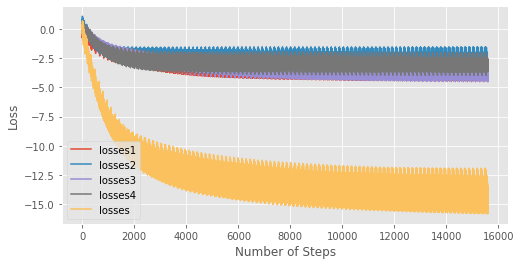

In [44]:
plot_stats_in_graph(metric_dict1, y_axis_label='Loss', x_axis_label='Number of Steps')